# Fig 2 A-C-D-E-F-G

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
from shapely.geometry import Point
import sys,os

# set the path to the root directory of the git
path_root = r'C:/Users/miln/tubCloud/Work-in-progress/main-project/new_git'

# enable python to find the modules
sys.path.append(path_root)

from Utils.preproc_utils import import_csv_w_wkt_to_gdf

In [4]:
path_streets = os.path.join('E:\\','Data','Data samples','Udine_streets.csv')
edges = import_csv_w_wkt_to_gdf(path_streets, 7794)

### Retrieval

Let's run the function `block_street_based` for the whole city.

In [6]:
blocks = block_street_based(edges)

Splitted:
{150: 2, 187: 1, 188: 1, 233: 1, 235: 1, 242: 4, 257: 1, 512: 4, 694: 4, 739: 1, 1165: 1, 1201: 1, 1248: 1, 1393: 1, 1404: 4, 1554: 1, 1555: 2, 1556: 3, 1759: 1, 1766: 3, 1767: 1, 1768: 1, 1774: 1, 1803: 3, 1805: 2, 1808: 3, 2043: 4, 2053: 1, 2099: 3, 2104: 2, 2133: 4, 2230: 2, 2255: 4, 2256: 2, 2298: 4, 2404: 1, 2428: 1, 2454: 2, 2575: 4, 2577: 2, 2578: 1, 2610: 2, 2740: 4, 2742: 1, 2743: 2, 2847: 2, 2852: 1, 2874: 5, 2924: 1, 2926: 1, 3027: 4, 3151: 1, 3193: 1, 3200: 4, 3204: 4, 3239: 1, 3241: 1, 3242: 1, 3353: 1, 3356: 1, 3611: 2, 3616: 1, 3617: 4, 3619: 8, 3627: 3, 3653: 2, 3661: 4, 3828: 1, 4107: 1, 4112: 1, 4113: 1, 4126: 3, 4241: 1, 4280: 1, 4423: 1, 4507: 1, 4616: 4, 4623: 1, 4636: 1, 4637: 3, 4639: 1, 4640: 1, 4645: 1, 4688: 3, 4728: 2, 4751: 2, 4777: 2, 4783: 1, 4929: 1, 5066: 1, 5069: 2, 5135: 3, 5313: 1, 5350: 1, 5426: 3, 5427: 3, 5435: 1, 5456: 1, 5484: 2, 5719: 4, 5770: 1, 5777: 1, 5974: 3, 6003: 1, 6027: 2, 6028: 2, 6042: 1, 6188: 1, 6194: 1, 6197: 1, 6198: 1, 

In [184]:
path = os.path.join('E:\\','Data','Data samples',
                    'Udine_buildings_w_building_ft.csv')

Udine_buildings = import_csv_w_wkt_to_gdf(path, 7794)

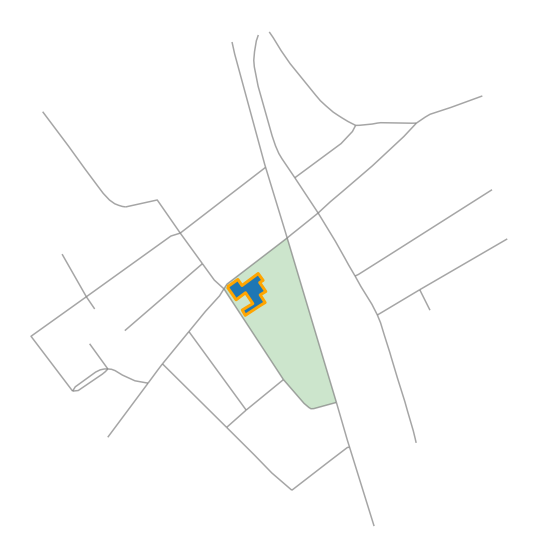

In [181]:
fig, ax = plt.subplots(figsize=(10,10))
precise_matches_str.plot(ax=ax, color = 'grey', alpha = 0.7, linewidth = 1.5)
precise_matches_sbb.loc[[978]].plot(ax=ax, color = 'green',alpha=.2)
Udine_buildings.loc[[23201]].plot(ax=ax)
Udine_buildings.loc[[23201]].boundary.plot(ax=ax, color = 'orange', linewidth = 3)

plt.axis('off')
plt.savefig(r'E:\Figures\Fig2-C.svg',dpi=400)

In [185]:
i = 23200

buffer = Udine_buildings['geometry'].centroid[i].buffer(100)
possible_matches_index = list(spatial_index_bu.intersection(buffer.bounds))
possible_matches = Udine_buildings.loc[possible_matches_index] 
precise_matches_bu = possible_matches[possible_matches.intersects(buffer)]

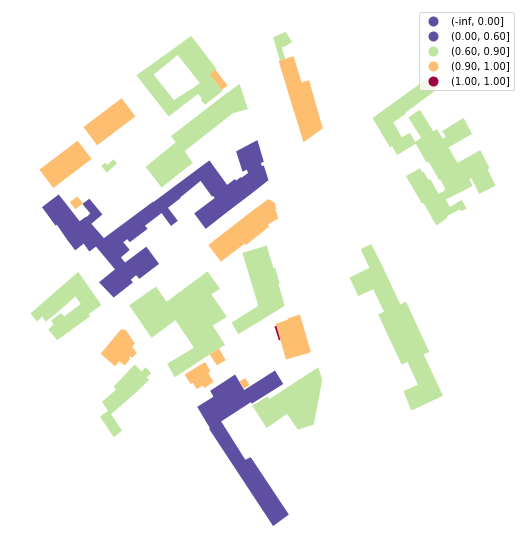

In [195]:
fig, ax = plt.subplots(figsize=(10,10))
precise_matches_bu.plot(ax=ax, column = 'Convexity', legend=True, cmap='Spectral_r', 
                     scheme='user_defined', 
                     classification_kwds={'bins':[0, 0.6,  0.9,  1]})
plt.axis('off')
plt.savefig(r'E:\Figures\Fig2-A.svg',dpi=400)

In [197]:
spatial_index = Udine_buildings.sindex

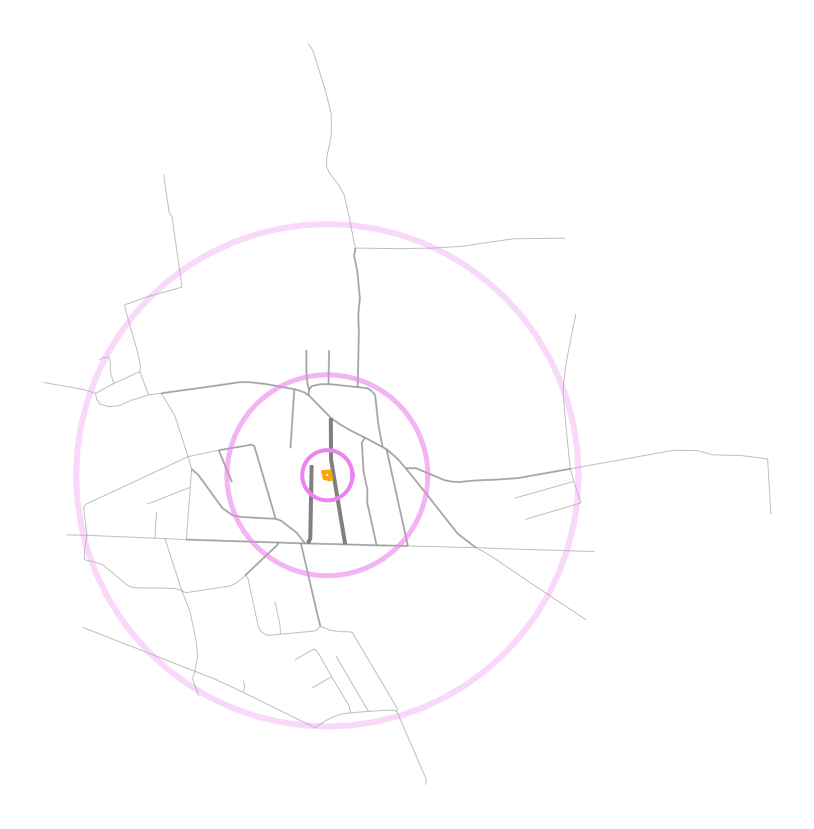

In [228]:
buf_size = 50
buf_size_2 = 200
buf_size_3 = 500

i = 400

buffer = Udine_buildings['geometry'].centroid[i].buffer(buf_size)
possible_matches_index = list(spatial_index_str.intersection(buffer.bounds))
possible_matches = edges.loc[possible_matches_index] 
precise_matches = possible_matches[possible_matches.intersects(buffer)]

buffer2 = Udine_buildings['geometry'].centroid[i].buffer(buf_size_2)
possible_matches_index = list(spatial_index_str.intersection(buffer2.bounds))
possible_matches = edges.loc[possible_matches_index] 
precise_matches2 = possible_matches[possible_matches.intersects(buffer2)]


buffer3 = Udine_buildings['geometry'].centroid[i].buffer(buf_size_3)
possible_matches_index = list(spatial_index_str.intersection(buffer3.bounds))
possible_matches = edges.loc[possible_matches_index] 
precise_matches3 = possible_matches[possible_matches.intersects(buffer3)]


# check sample
fig, ax = plt.subplots(figsize=(15,15))
precise_matches3.plot(ax=ax, alpha = 0.5, color = 'grey', linewidth = 1)
precise_matches2.plot(ax=ax, alpha = 0.5, color = 'grey', linewidth = 2)
precise_matches.plot(ax=ax, color = 'grey', linewidth = 4)
plt.plot(*Udine_buildings.loc[i]['geometry'].exterior.xy, color='orange',linewidth=4)

plt.plot(*Udine_buildings.loc[i]['geometry'].centroid.buffer(buf_size).exterior.xy, color='violet',linewidth=4)
plt.plot(*Udine_buildings.loc[i]['geometry'].centroid.buffer(buf_size_2).exterior.xy, color='violet',linewidth=5, alpha = 0.6)
plt.plot(*Udine_buildings.loc[i]['geometry'].centroid.buffer(buf_size_3).exterior.xy, color='violet',linewidth=6, alpha = 0.3)

plt.axis('off')
plt.savefig(r'E:\Figures\Fig2-E.svg',dpi=400)

In [ ]:
buf_size = 50
buf_size_2 = 200
buf_size_3 = 500

i = 2

buffer = Udine_buildings['geometry'].centroid[i].buffer(buf_size)
possible_matches_index = list(spatial_index.intersection(buffer.bounds))
possible_matches = Udine_buildings.loc[possible_matches_index] 
precise_matches = possible_matches[possible_matches.intersects(buffer)]

buffer2 = Udine_buildings['geometry'].centroid[i].buffer(buf_size_2)
possible_matches_index = list(spatial_index.intersection(buffer2.bounds))
possible_matches = Udine_buildings.loc[possible_matches_index] 
precise_matches2 = possible_matches[possible_matches.intersects(buffer2)]


buffer3 = Udine_buildings['geometry'].centroid[i].buffer(buf_size_3)
possible_matches_index = list(spatial_index.intersection(buffer3.bounds))
possible_matches = Udine_buildings.loc[possible_matches_index] 
precise_matches3 = possible_matches[possible_matches.intersects(buffer3)]


# check sample
fig, ax = plt.subplots(figsize=(15,15))
precise_matches3.plot(ax=ax, alpha = 0.3)
precise_matches2.plot(ax=ax, alpha = 0.5)
precise_matches.plot(ax=ax)
plt.plot(*Udine_buildings.loc[i]['geometry'].exterior.xy, color='orange',linewidth=4)

plt.plot(*Udine_buildings.loc[i]['geometry'].centroid.buffer(buf_size).exterior.xy, color='violet',linewidth=4)
plt.plot(*Udine_buildings.loc[i]['geometry'].centroid.buffer(buf_size_2).exterior.xy, color='violet',linewidth=5, alpha = 0.6)
plt.plot(*Udine_buildings.loc[i]['geometry'].centroid.buffer(buf_size_3).exterior.xy, color='violet',linewidth=6, alpha = 0.3)

plt.axis('off')
plt.savefig(r'E:\Figures\Fig2-D.svg',dpi=400)

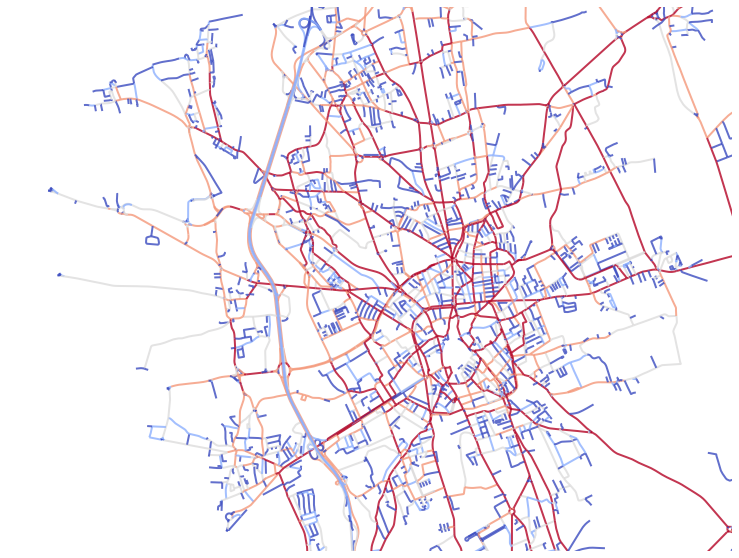

In [271]:
f, ax = plt.subplots(figsize=(20, 10))
edges.plot(ax=ax, column='betweenness_metric_e', cmap='coolwarm', scheme='quantiles', alpha=0.8, linewidth=2)
plt.ylim(5093000,5102000)
plt.xlim(7088000,7100000)
plt.axis('off')
plt.savefig(r'E:\Figures\Fig2-F.svg',dpi=400)

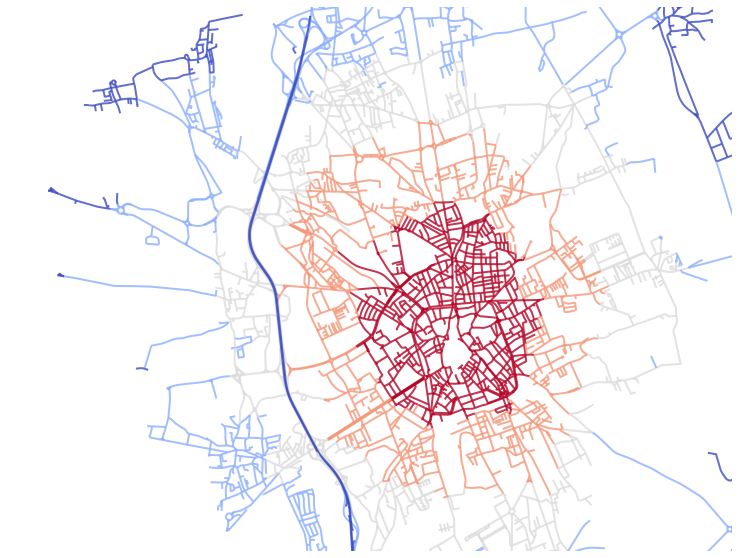

In [272]:
f, ax = plt.subplots(figsize=(20, 10))
edges.plot(ax=ax, column='closeness_global', cmap='coolwarm', scheme='quantiles', alpha=0.8 ,linewidth=2)
plt.ylim(5093000,5102000)
plt.xlim(7088000,7100000)
plt.axis('off')
plt.savefig(r'E:\Figures\Fig2-G.svg',dpi=400)